
# Worked Example: 1D Wave Propagation in an Elastic Bar

In this worked example, we examine the transient response of a long, linearly elastic bar subjected to a sudden compressive stress. This classic wave propagation problem illustrates how elastic waves travel through a medium after an initial disturbance.

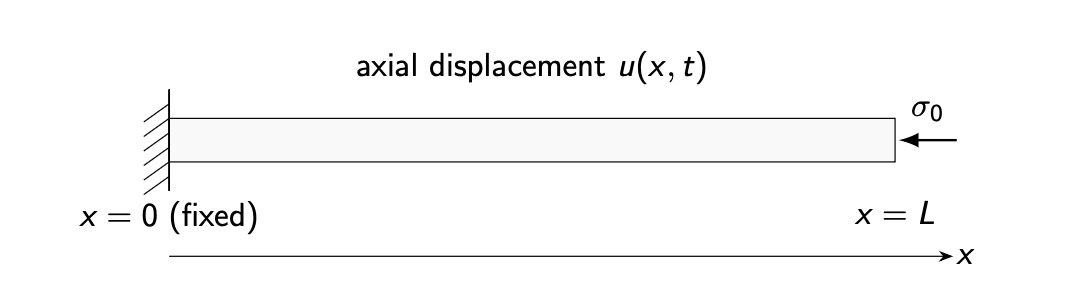
---

## Problem Statement

Consider a long, linearly elastic bar of length $ L $ and circular cross-sectional area $ A $, as shown in the schematic below.

- The **left end** of the bar ($ x = 0 $) is **clamped**.
- A **sudden compressive stress** of magnitude $ \sigma_0 $ is applied at the **free end** ($ x = L $) at time $ t = 0 $.

Our objective is to determine the displacement field $ u(x, t) $ as a function of space and time.


---
## Governing Equation

The 1D wave equation for longitudinal motion in an elastic bar is:

\begin{equation}
\rho \frac{\partial^2 u}{\partial t^2} = E \frac{\partial^2 u}{\partial x^2}
\end{equation}

where:
- $ u(x, t) $: displacement field
- $ \rho $: mass density of the material
- $ E $: Young's modulus
- $ x $: position along the bar
- $ t $: time



---

## Initial and Boundary Conditions

We apply the following conditions:

- Initial Conditions:
  \begin{equation}
  u(x, 0) = 0, \quad \frac{\partial u}{\partial t}(x, 0) = 0
  \end{equation}

- Boundary Conditions:
  \begin{equation}
  u(0, t) = 0 \quad \text{(clamped end)}
  \end{equation}
  \begin{equation}
  \sigma(L, t) = -\sigma_0 \Rightarrow E \frac{\partial u}{\partial x}(L, t) = -\sigma_0
 \end{equation}

These conditions represent a bar initially at rest, fixed at one end and suddenly loaded at the other.



---

## Numerical Simulation (Finite Difference Method)

We solve the wave equation numerically using an explicit finite difference scheme. Define:

- Space step: $ \Delta x = L / N $
- Time step: $ \Delta t $
- Wave speed: $ c = \sqrt{E/\rho} $
- Courant number: $ r = \frac{c \Delta t}{\Delta x} $

The update equation for the displacement at the interior grid point $i$ and time level $ n $ is:

\begin{equation}
\boxed{
u_i^{n+1} = 2(1 - r^2) u_i^n - u_i^{n-1} + r^2 (u_{i+1}^n + u_{i-1}^n)
}
\end{equation}
where
\begin{equation}
r = \frac{c \Delta t}{\Delta x}
\end{equation}


---
## Boundary conditions

#### Dirichlet condition at left end $u(0,t) = 0$
Make sure to set u[n,0] = 0 for all time steps n.

#### Neumann condition at $x=L$
\begin{equation}
\boxed{
u_N^{n+1}
=
2u_N^n-u_N^{n-1}
+
2r^2\Big(u_{N-1}^n-u_N^n-\Delta x\,\frac{\sigma^*}{E}\Big)
}
\end{equation}

The boxed equation above updates the displacement at grid point N to enforce the prescribed stress condition.

In [243]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [244]:
# Parameters
L = 10.0        # Length of bar (m)
A = 1.0        # Cross-sectional area (m^2)
E = 200e9      # Young's modulus (Pa)
rho = 7850     # Density (kg/m^3)
sigma0 = 60e6   # Applied stress (Pa)

In [245]:
# Define grid points and time step etc.
N =200                    # Number of spatial intervals
dx = L / N                # Spatial step size
c = np.sqrt(E / rho)      # Wave speed
r = 0.5                   # Courant number
dt = r*dx/c               # Time step
T = 0.008                 # Total time
M = int(T / dt)           # Number of time steps

In [246]:
# Allocate
u = np.zeros((M+1, N+1))
# -----------------------------
# CTCS TIME STEPPING
# -----------------------------
for n in range(1, M):
    # interior
    for i in range(1, N):
        u[n+1, i] = 2*(1-r**2)*u[n, i] - u[n-1, i] + r**2*(u[n, i+1] + u[n, i-1])
    # left BC (clamped)
    u[n+1, 0] = 0.0
    # right BC (traction) at time level n
    u[n+1, N] = 2*u[n, N]- u[n-1, N]+ 2*r**2*(u[n, N-1] - u[n, N] - dx*sigma0/E)

In [255]:
# Convert the u array to a dataframe and examine the first few rows (time steps)
df_disp = pd.DataFrame(u)
#df_disp.head()

In [248]:
# Now let's compute the stress at each grid point
sigma = np.zeros_like(u)
#
for n in range(0, M+1):
    for i in range(1, N):
        sigma[n, i] = E * (u[n, i+1] - u[n, i-1]) / (2*dx)

In [253]:
# store stress at middle of the bar as stress_middle
i_mid = N//2 #Python integer division
sigma_mid = sigma[:, i_mid]
tvec = np.linspace(0,T,M+1)

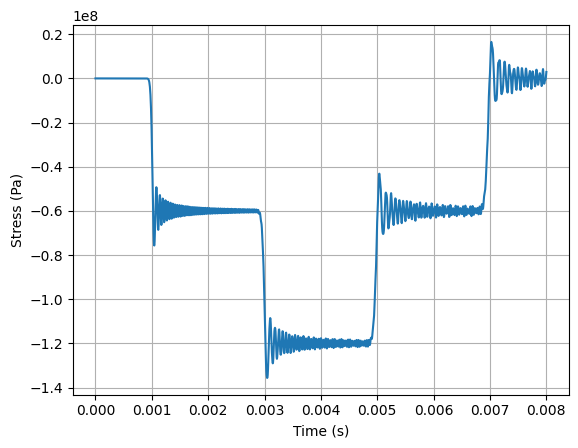

In [254]:
plt.plot(tvec, sigma_mid)
plt.xlabel("Time (s)")
plt.ylabel("Stress (Pa)")
plt.grid(True)
plt.show()


---

## Remarks

- The stress pulse propagates from the free end toward the clamped end and reflects back.
- The stress doubling occurs because a compressive wave reflects from the clamped end without sign change. When the reflected wave overlaps the incident wave, their stresses superpose, producing a temporary magnitude of $2\sigma_0$
- This method can be extended to study more complex loading histories and geometries.

